In [20]:
#importing packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [21]:
#IMPORTING AND CLEANING DATA

# read data
df = pd.read_csv("dataset.txt")

# checking shape and data types of the data
print(df.shape, "\n")
print(df.dtypes, "\n")

# checking numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The column with numeric values include:", numeric_cols, "\n")

# checking non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The columns and non-numeric values include:", non_numeric_cols, "\n")

#viewing missing data via percentage list
cols = df.columns[:]
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
  #  print('{} - {}%'.format(col, round(pct_missing*100)))
    

# removing duplicate data
df_dedupped = df.drop_duplicates()
print(df.shape, "\n")
print(df_dedupped.shape, "\n")


(550, 7) 

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object 

The column with numeric values include: ['User Rating' 'Reviews' 'Price' 'Year'] 

The columns and non-numeric values include: ['Name' 'Author' 'Genre'] 

(550, 7) 

(550, 7) 



In [22]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


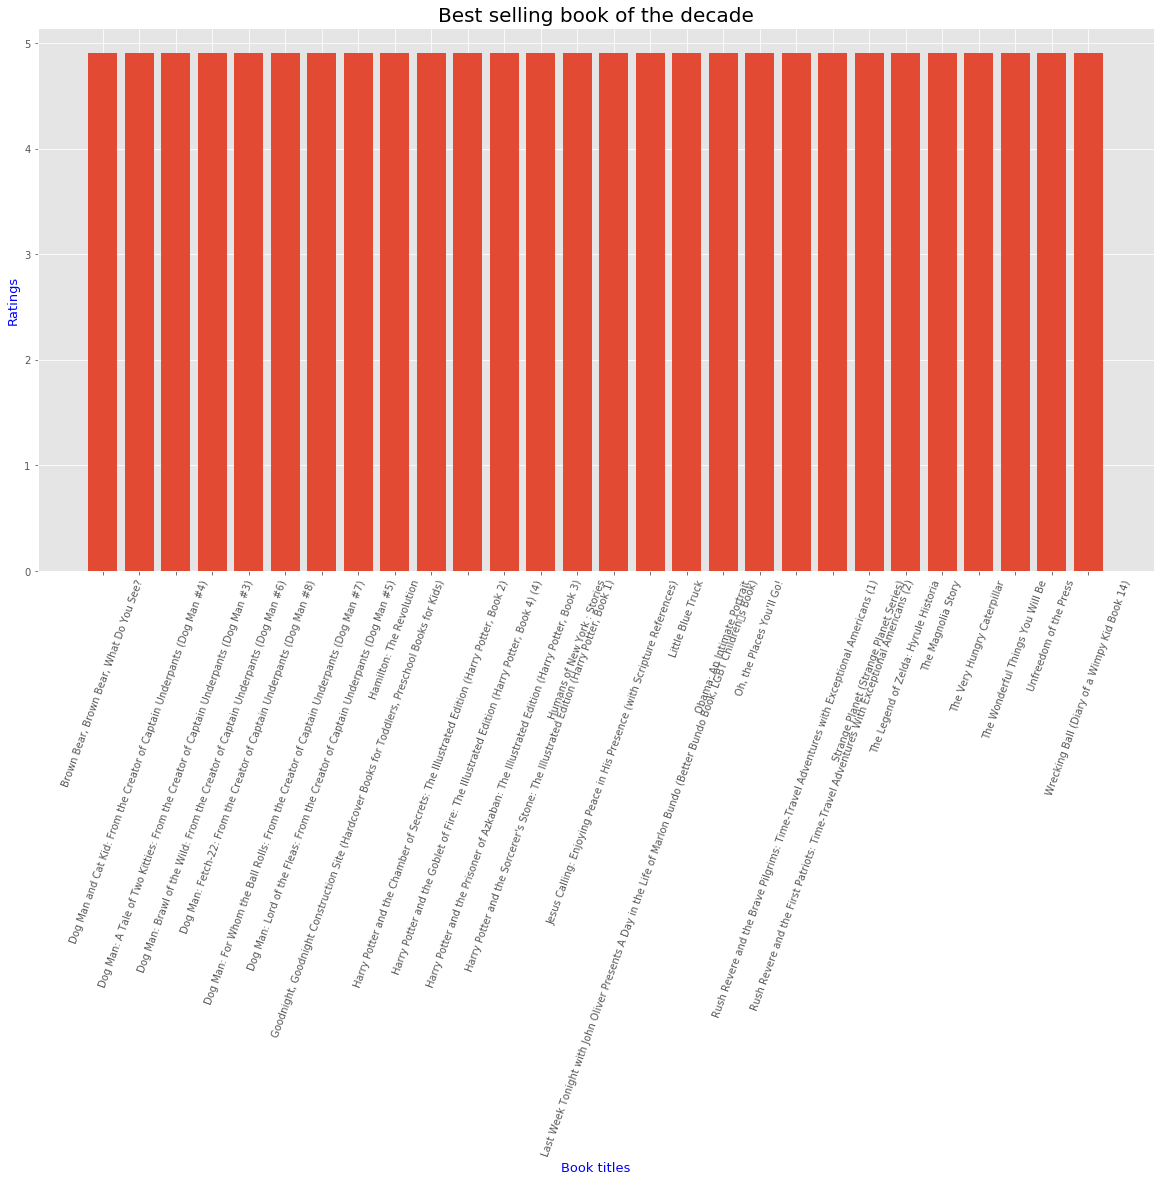

In [23]:
#Visualizing 20 best selling books of the decade.

best_seller = df.nlargest(20,'User Rating',  keep='all')
plt.bar(best_seller['Name'], best_seller['User Rating'])
plt.title('Best selling book of the decade', size=20)
plt.xticks(rotation = 70)
plt.xlabel('Book titles', fontsize=13,color='blue' )
plt.ylabel('Ratings', fontsize=13,color='blue')
plt.show()



percentage of non-fiction books = 56.36
percentage of fiction books = 43.64


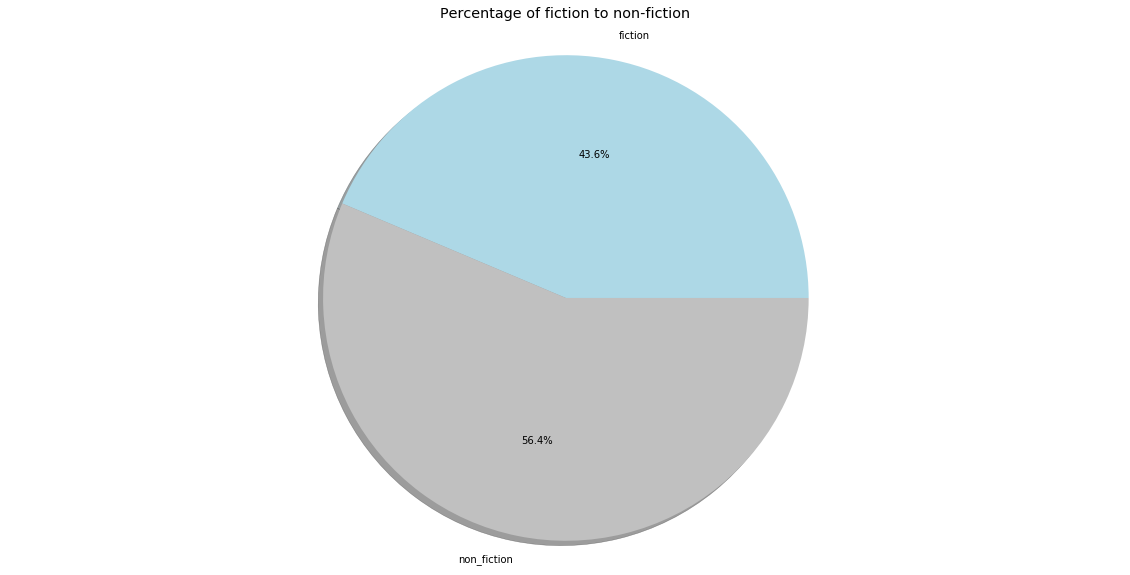

In [24]:
#Visualizing The percentage of fiction to non-fiction.

genre = df["Genre"]
my_colors = ['lightblue','silver']

non_fiction = np.sum(genre == "Non Fiction")
pct_non_fiction = round((non_fiction/550)*100, 2)
print(f"percentage of non-fiction books = {pct_non_fiction}")

fiction = np.sum(genre == "Fiction")
pct_fiction = round((fiction/550)*100, 2)
print(f"percentage of fiction books = {pct_fiction}")

plt.pie([fiction, non_fiction],labels= ["fiction", "non_fiction"], autopct='%1.1f%%',
        colors = my_colors, shadow = True)
plt.title('Percentage of fiction to non-fiction')
plt.axis('equal')

plt.show()


VISUALIZING TRENDS OVER THE YEARS

In trying to visualize the trends over the years using seaborn, I have run into an error I am unable to fix. I could keep trying, but the submission deadline is close. I might have to submit the fill and update a better solution as soon as I learn how to. 

ValueError: A wide-form input must have only numeric values.

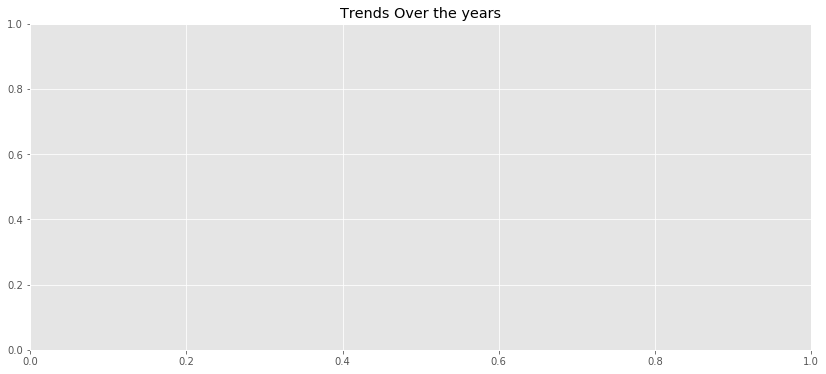

In [25]:
#VISUALIZING TRENDS OVER THE YEARS


plt.figure(figsize=(14,6))
plt.title("Trends Over the years")
sns.lineplot(data=df)

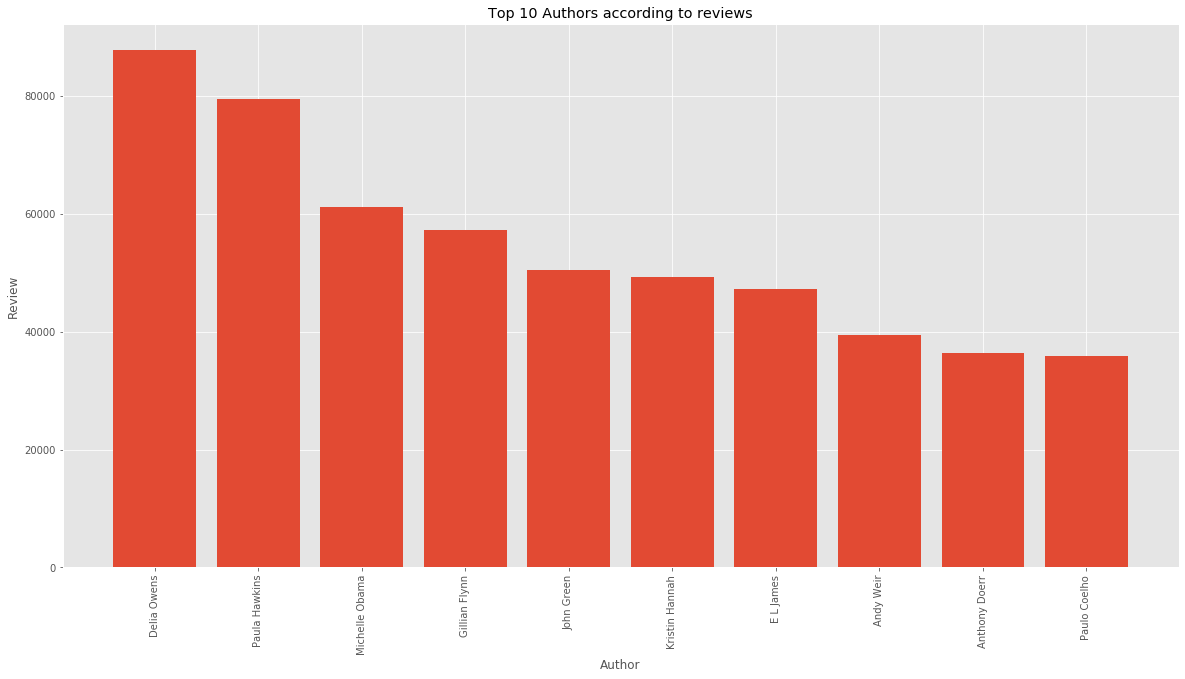

In [26]:
#Visualizing Top 10 Authors according to reviews.

#Authors_reviews = df.columns[2,4]
top_authors = df.nlargest(20,'Reviews',  keep='all')
top_authors

plt.bar(top_authors['Author'], top_authors['Reviews'])
plt.title('Top 10 Authors according to reviews')
plt.xticks(rotation = 90)
plt.xlabel('Author')
plt.ylabel('Review')
plt.show()